In [21]:
from matplotlib.backend_bases import MouseEvent

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os

In [22]:
from pathlib import Path
if _dh[0] == Path(os.path.abspath(os.path.curdir)):  # Change working directory outside the scripts/ folder
    os.chdir("../")

In [23]:
from camera import Camera

In [24]:
H_affine = np.array([
        [ 1.41369034e+00,  2.61865419e-02, -2.76181195e+02],
        [ 4.39939439e-03,  1.41815829e+00, -8.79810702e+01],
])


H_cam_robot = np.matrix([
    [ 0,  0,  1,    0],
    [-1,  0,  0,    0],
    [ 0, -1,  0,  900],
    [ 0, 0,   0,    1],
])

camera_matrix = np.matrix([
        [610.3503, 0,           324.2132],
        [0,        614.0150,    250.7816],
        [0,        0,           1       ]
    ])

distortion_coef = np.array([0.0386, 0.3294, 0.0052, 0.0033, -1.3842])

cam = Camera(camera_matrix, H_affine, H_cam_robot, "models/best.pt", "models/FastSAM-s.pt", device="cuda")

In [25]:
base_path = Path("./data/ovire-v-zraku-cam1/")
frame = "frame_0090.png"
img_rgb = cv.cvtColor(cv.imread(base_path.joinpath(f"./png/{frame}")), cv.COLOR_BGR2RGB)
img_depth = cv.imread(base_path.joinpath(f"./depth/{frame}"), cv.IMREAD_GRAYSCALE)

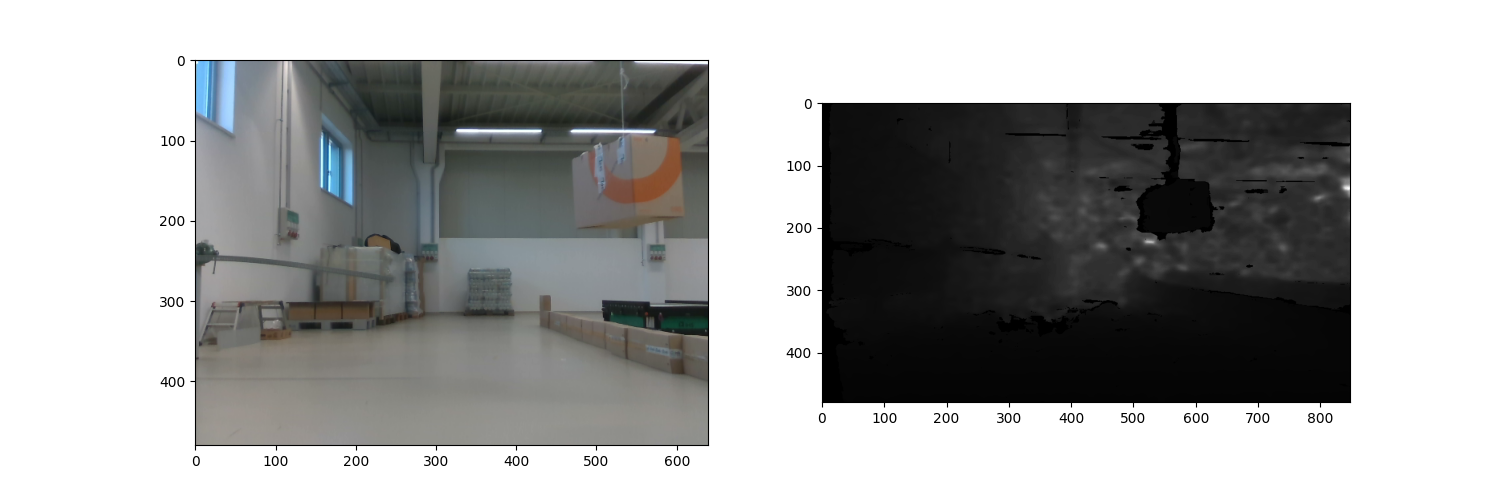

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.imshow(img_rgb)
ax2.imshow(img_depth, cmap="gray")

In [27]:
%matplotlib widget

18

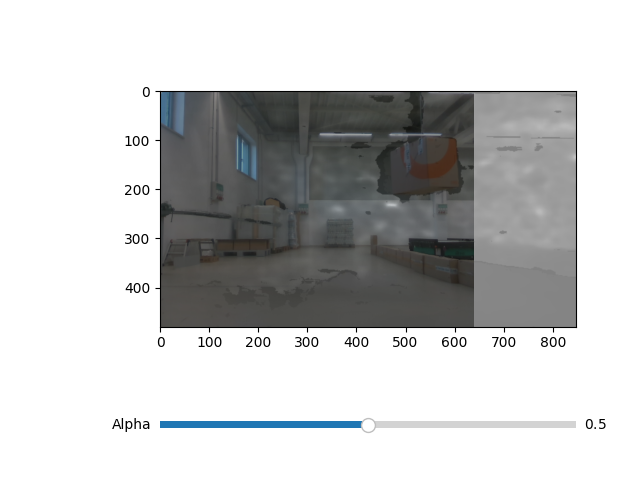

In [28]:
fig, ax = plt.subplots()
img_depth_aligned = cam.depth.align(img_depth)#[:img_rgb.shape[0], :img_rgb.shape[1]]

fx = fy = 322.28
cx = 320.82
cy = 178.78

ax.imshow(img_rgb)
aximg = ax.imshow(img_depth_aligned, cmap="gray", alpha=0.5)

def on_update(value: float):
    aximg.set_alpha(value)

def on_click(event: MouseEvent):
    if event.xdata is not None:
        x = int(event.xdata)
        y = int(event.ydata)
        depth = img_depth[y, x] / 6 * 1000

        cam_xyz = cam.pixel_to_xyz(x, y, depth)
        robot_xyz = cam.transform_to_robot_xyz(cam_xyz)
        ax.set_title(f"{robot_xyz=}")

axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = plt.Slider(
    ax=axfreq,
    label='Alpha',
    valmin=0.0,
    valmax=1.0,
    valinit=0.5,
)

fig.subplots_adjust(left=0.25, bottom=0.25)
freq_slider.on_changed(on_update)
fig.canvas.mpl_connect("button_press_event", on_click)

![](koordinatni_sistem.png)